In [41]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


# network and training
EPOCHS = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION

# loading MNIST dataset
# verify
# the split between train and test is 60,000, and 10,000 respectly 
# one-hot is automatically applied
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


print("==Before reshape==")
print("Training:")
print(type(X_train), type(Y_train))
print(X_train.shape, Y_train.shape)
print("Testing:")
print(type(X_test), type(Y_test))
print(X_test.shape, Y_test.shape)


==Before reshape==
Training:
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(60000, 28, 28) (60000,)
Testing:
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(10000, 28, 28) (10000,)


image label 0 -  min:0,max:255, mean:39.661989795918366, std:83.88715868331147
image label 1 -  min:0,max:255, mean:21.855867346938776, std:66.0788867702743
image label 2 -  min:0,max:255, mean:37.75637755102041, std:81.10468534454127
image label 3 -  min:0,max:255, mean:45.74872448979592, std:90.0166048934103
image label 4 -  min:0,max:255, mean:24.799744897959183, std:65.57974931595184
image label 5 -  min:0,max:255, mean:35.108418367346935, std:79.64882892760731
image label 6 -  min:0,max:255, mean:36.27933673469388, std:79.88780258337873
image label 7 -  min:0,max:255, mean:32.265306122448976, std:77.41747429971547
image label 8 -  min:0,max:255, mean:34.57397959183673, std:78.44543233070108
image label 9 -  min:0,max:255, mean:29.60969387755102, std:74.37131543202635


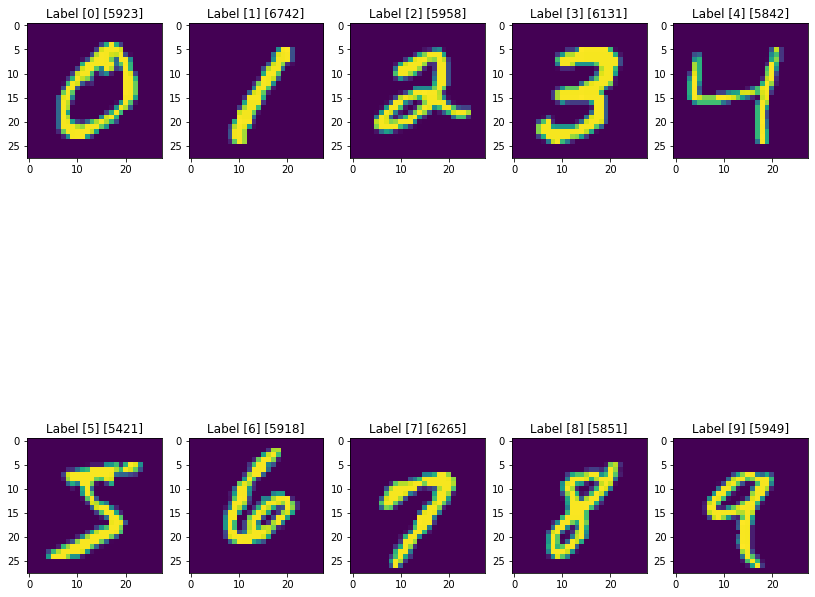

In [43]:
labels = Y_train.tolist()
unique_labels = set(labels)
plt.figure(figsize=(14, 14))
i=1
# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = X_train[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(2, 5, i)
    # Don't include axes
    plt.axis('on')
     
    mean= np.mean(image)
    std = np.std(image)
    min_ = np.min(image)
    max_ = np.max(image)
    print("image label {} -  min:{},max:{}, mean:{}, std:{}"
          .format(label, min_, max_, mean, std))
    # Add a title to each subplot
    plt.title("Label [{0}] [{1}]".format(label, labels.count(label)))
    # Add 1 to the counter
    # And you plot this first image 
    plt.imshow(image)
    i +=1
plt.show()

In [34]:

#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("==After reshape==")
print("Training:")
print(type(X_train), type(Y_train))
print(X_train.shape, Y_train.shape)
print("Testing:")
print(type(X_test), type(Y_test))
print(X_test.shape, Y_test.shape)

==After reshape==
Training:
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(60000, 784) (60000,)
Testing:
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(10000, 784) (10000,)


In [39]:
#normalize in [0,1]
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

#one-hot
Y_train_oh = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test_oh = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

for i in range(10):
    print("label:{} - onehot: {}".format(Y_train[i], Y_train_oh[i]))


60000 train samples
10000 test samples
label:5 - onehot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
label:0 - onehot: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
label:4 - onehot: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
label:1 - onehot: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
label:9 - onehot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
label:2 - onehot: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
label:1 - onehot: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
label:3 - onehot: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
label:1 - onehot: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
label:4 - onehot: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [36]:
for label in unique_labels:
    # You pick the first image for each label
    image = X_train[labels.index(label)]
 
    mean= np.mean(image)
    std = np.std(image)
    min_ = np.min(image)
    max_ = np.max(image)
    print("image label {} -  min:{},max:{}, mean:{}, std:{}"
          .format(label, min_, max_, mean, std))
    # Add a title to each subplot

image label 0 -  min:0.0,max:1.0, mean:0.1555372178554535, std:0.328969269990921
image label 1 -  min:0.0,max:1.0, mean:0.08570928126573563, std:0.25913289189338684
image label 2 -  min:0.0,max:1.0, mean:0.14806421101093292, std:0.3180576264858246
image label 3 -  min:0.0,max:1.0, mean:0.1794067621231079, std:0.3530063033103943
image label 4 -  min:0.0,max:1.0, mean:0.09725390374660492, std:0.257175475358963
image label 5 -  min:0.0,max:1.0, mean:0.1376800686120987, std:0.3123483657836914
image label 6 -  min:0.0,max:1.0, mean:0.14227190613746643, std:0.3132854998111725
image label 7 -  min:0.0,max:1.0, mean:0.12653061747550964, std:0.30359795689582825
image label 8 -  min:0.0,max:1.0, mean:0.13558423519134521, std:0.30762913823127747
image label 9 -  min:0.0,max:1.0, mean:0.11611644923686981, std:0.29165220260620117


In [37]:
#build the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(NB_CLASSES,
   		input_shape=(RESHAPED,),
   		name='dense_layer', 
   		activation='softmax'))

# summary of the model
model.summary()
#tf.keras.utils.plot_model(model, to_file="model.png")


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [38]:
# compiling the model
model.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#training the model
model.fit(X_train, Y_train_oh,
		batch_size=BATCH_SIZE, epochs=EPOCHS,
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

#evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test_oh)
print('Test accuracy:', test_acc)

# making prediction
predictions = model.predict(X_test)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 2s 42us/sample - loss: 1.3830 - accuracy: 0.6636 - val_loss: 0.8883 - val_accuracy: 0.8333
Epoch 2/200
48000/48000 [==============================] - 3s 63us/sample - loss: 0.7878 - accuracy: 0.8350 - val_loss: 0.6510 - val_accuracy: 0.8633
Epoch 3/200
48000/48000 [==============================] - 2s 35us/sample - loss: 0.6382 - accuracy: 0.8547 - val_loss: 0.5565 - val_accuracy: 0.8733
Epoch 4/200
48000/48000 [==============================] - 2s 31us/sample - loss: 0.5667 - accuracy: 0.8643 - val_loss: 0.5043 - val_accuracy: 0.8798
Epoch 5/200
48000/48000 [==============================] - 1s 31us/sample - loss: 0.5232 - accuracy: 0.8705 - val_loss: 0.4710 - val_accuracy: 0.8853
Epoch 6/200
48000/48000 [==============================] - 1s 30us/sample - loss: 0.4935 - accuracy: 0.8750 - val_loss: 0.4474 - val_accuracy: 0.8876
Epoch 7/200
48000/48000 [=========================

Epoch 55/200
48000/48000 [==============================] - 7s 145us/sample - loss: 0.3173 - accuracy: 0.9120 - val_loss: 0.3037 - val_accuracy: 0.9151
Epoch 56/200
48000/48000 [==============================] - 3s 60us/sample - loss: 0.3166 - accuracy: 0.9123 - val_loss: 0.3031 - val_accuracy: 0.9152
Epoch 57/200
48000/48000 [==============================] - 5s 106us/sample - loss: 0.3159 - accuracy: 0.9124 - val_loss: 0.3026 - val_accuracy: 0.9153
Epoch 58/200
48000/48000 [==============================] - 2s 41us/sample - loss: 0.3152 - accuracy: 0.9125 - val_loss: 0.3021 - val_accuracy: 0.9154
Epoch 59/200
48000/48000 [==============================] - 2s 40us/sample - loss: 0.3145 - accuracy: 0.9126 - val_loss: 0.3016 - val_accuracy: 0.9157
Epoch 60/200
48000/48000 [==============================] - 2s 47us/sample - loss: 0.3138 - accuracy: 0.9131 - val_loss: 0.3010 - val_accuracy: 0.9158
Epoch 61/200
48000/48000 [==============================] - 1s 31us/sample - loss: 0.3131 - 

Epoch 163/200
48000/48000 [==============================] - 2s 36us/sample - loss: 0.2816 - accuracy: 0.9214 - val_loss: 0.2785 - val_accuracy: 0.9222
Epoch 164/200
48000/48000 [==============================] - 2s 45us/sample - loss: 0.2815 - accuracy: 0.9213 - val_loss: 0.2783 - val_accuracy: 0.9221
Epoch 165/200
48000/48000 [==============================] - 3s 61us/sample - loss: 0.2813 - accuracy: 0.9218 - val_loss: 0.2782 - val_accuracy: 0.9218
Epoch 166/200
48000/48000 [==============================] - 7s 142us/sample - loss: 0.2811 - accuracy: 0.9214 - val_loss: 0.2782 - val_accuracy: 0.9222
Epoch 167/200
48000/48000 [==============================] - 4s 88us/sample - loss: 0.2810 - accuracy: 0.9217 - val_loss: 0.2781 - val_accuracy: 0.9221
Epoch 168/200
48000/48000 [==============================] - 3s 65us/sample - loss: 0.2809 - accuracy: 0.9218 - val_loss: 0.2779 - val_accuracy: 0.9221
Epoch 169/200
48000/48000 [==============================] - 4s 80us/sample - loss: 0.2

Test accuracy: 0.9227
